# Analysis of Results

In [29]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
def plot_training_loss(loss_name = "MAEProbDistrLoss", residual = False, folder_path = "./trained", alphas = [0.2, 0.4, 0.6, 0.8], plot_validation = False):
    
    if plot_validation:
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
        
        ax[0].set_title('Training')
        ax[1].set_title('Validation')
    
    else:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
        
    for alpha in alphas:
        
        # Define the model name
        model_name = f"{loss_name}_{alpha}"
        
        # If residual is used in the model, append residual to the end
        if residual:
            model_name = f"{model_name}_residual"
            
        path = os.path.join(folder_path, model_name) # Get the model path
        train_loss_path = os.path.join(path, "epoch_loss.txt") # Get the loss file
        
        loss_df = pd.read_csv(train_loss_path, delimiter=",") # Reading the loss file into a dataframe
        
        if plot_validation:
            ax[0].plot(loss_df["epoch"], loss_df["train_loss"], label=alpha)
            ax[1].plot(loss_df["epoch"], loss_df["val_loss"], label=alpha)
        else:
            ax.plot(loss_df["epoch"], loss_df["train_loss"], label=alpha)
    
    if plot_validation:
        ax[0].legend()
        ax[1].legend()
        
        ax[0].set_yscale('log')
        ax[1].set_yscale('log')
        
        ax[0].set_xlabel("Epoch")
        ax[1].set_xlabel("Epoch")
        
        ax[0].set_ylabel("Loss")
        ax[1].set_xlabel("Epoch")
        
        ax[0].set_ylim([1e-4, 1e4])
        ax[1].set_ylim([1e-4, 1e4])
    else:
        ax.legend()
        ax.set_yscale('log')
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Loss")
        ax.set_ylim([1e-4, 1e4])
    
        
    if residual: plt.savefig(f"./graphs/{loss_name}_residual.jpg")
    else: plt.savefig(f"./graphs/{loss_name}.jpg")
    

def summarize_evaluation(loss_name = "MAEProbDistrLoss", residual = False, folder_path = "./trained", alphas = [0.2, 0.4, 0.6, 0.8]):
    
    data = {}
    
    for alpha in alphas:
        
        
        # Define the model name
        if loss_name not in ["pretrained", "pretrained_residual"]: model_name = f"{loss_name}_{alpha}"
        else: model_name = loss_name
        
        
        # If residual is used in the model, append residual to the end
        if residual:
            model_name = f"{model_name}_residual"
        
        path = os.path.join(folder_path, model_name) # Get the model path
        eval_data_path = os.path.join(path, "daily2018_15_test_1_loss.txt") # Get the loss file
        eval_df = pd.read_csv(eval_data_path, delimiter=",") # Reading the loss file into a dataframe
        
        eval_df.drop(columns=["index"], inplace=True) # Dropping the index column
        print(eval_df.mean())
        
        # print(eval_df.head())

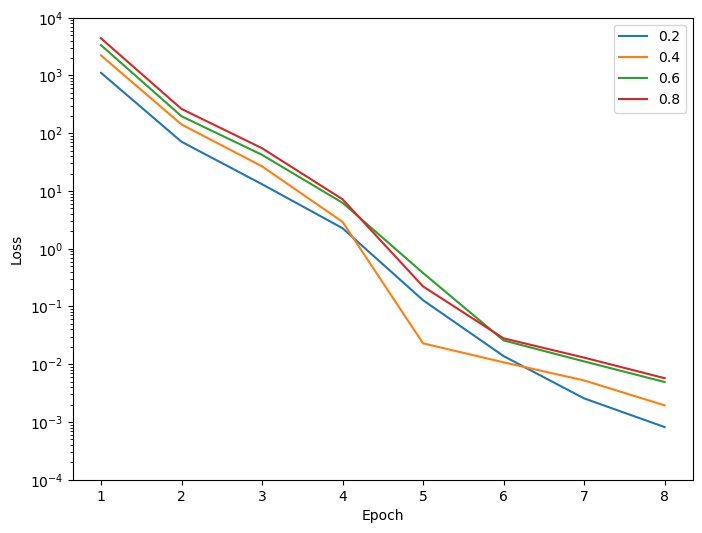

In [35]:
plot_training_loss(loss_name="MSEProbDistrLoss", residual=True)

In [32]:
summarize_evaluation(loss_name = "MSEProbDistrLoss", residual = True)

Series([], dtype: float64)
MAE          1.628335e-05
MSE          1.416591e-07
MAEwProba    5.882234e-02
MSEwProba    5.881104e-02
dtype: float64
MAE          1.630108e-05
MSE          1.416059e-07
MAEwProba    3.768390e-02
MSEwProba    3.767259e-02
dtype: float64


C:\Users\olanr\AppData\Local\Temp\ipykernel_22060\1518847445.py:80: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(eval_df.mean())


FileNotFoundError: [Errno 2] No such file or directory: './trained\\MSEProbDistrLoss_0.8_residual\\daily2018_15_test_1_loss.txt'